
<center><img src="https://i.ibb.co/8PYwxbB/autoencoder.png"></center>

## Imports



In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

## Preprocessing

### Load dataset

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


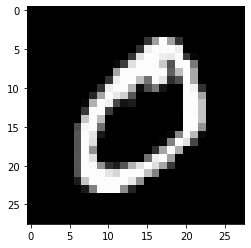

In [3]:
plt.imshow(X_train[1], cmap="gray")

### Data normalization

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Add noise to the dataset

(60000, 28, 28)


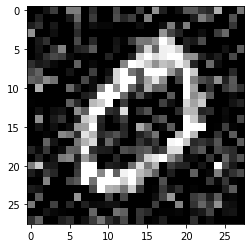

In [5]:
noise_factor = 0.3

X_train_noise = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  X_train_noise.append(noisy_image)

X_train_noise = np.array(X_train_noise)

print(X_train_noise.shape)

plt.imshow(X_train_noise[1], cmap="gray")

In [6]:
noise_factor = 0.3

X_test_noise = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  X_test_noise.append(noisy_image)

X_test_noise = np.array(X_test_noise)

print(X_test_noise.shape)

(60000, 28, 28)


In [7]:
X_train_noise = np.reshape(X_train_noise,(-1, 28, 28, 1))
X_test_noise = np.reshape(X_test_noise,(-1, 28, 28, 1))

print(X_train_noise.shape)
print(X_test_noise.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


## Learning

### Building Autoencoder

In [8]:
X_input = tf.keras.layers.Input((28,28,1))
# encoder
X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(X_input)
X = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same')(X)
# latent space
# decoder
X = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(X)
X = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(X)

model = tf.keras.models.Model(inputs=X_input, outputs=X)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 2,633
Trainable params: 2,633
Non-trainable params: 0
_________________________________________________________________


### Train

In [9]:
history = model.fit(X_train_noise, X_train, batch_size=100, validation_split=0.1, epochs=20)

Epoch 1/20
540/540 [==============================] - 3s 6ms/step - loss: 0.1897 - val_loss: 0.0956
Epoch 2/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0898 - val_loss: 0.0881
Epoch 3/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0868 - val_loss: 0.0871
Epoch 4/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0861 - val_loss: 0.0867
Epoch 5/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0858 - val_loss: 0.0864
Epoch 6/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0856 - val_loss: 0.0863
Epoch 7/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0855 - val_loss: 0.0862
Epoch 8/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0855 - val_loss: 0.0861
Epoch 9/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0854 - val_loss: 0.0861
Epoch 10/20
540/540 [==============================] - 3s 6ms/step - loss: 0.0854 - val_loss: 0.0861

### Evaluation

In [10]:
predicted = model.predict(X_test_noise)

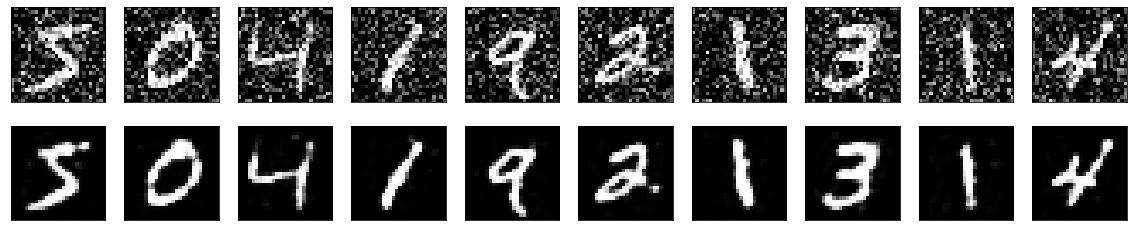

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test_noise[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)